sklearn中的线性回归的类仅有四个参数，且都不是必填项，说明线性回归的性能往往取决于数据本身，而非我们的调参能力，线性回归对数据有着很高的要求。

三种回归的适用情况：

线性回归，适用于变量之间不存在多重共线性的情况
岭回归和Lasso回归，适用于变量之间存在多重共线性的情况。由于正常情况下能上传的数据集一般都处理过了，出现严重的多重共线性几乎不可能。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
data = datasets.fetch_california_housing() #加利福尼亚房价数据集
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2,random_state =25)


In [2]:
st = StandardScaler()
st.fit(x_train)
x_train = st.transform(x_train)
x_test = st.transform(x_test)

In [3]:
#model = linear_model.Ridge(alpha=0.5)
model = linear_model.RidgeCV(alphas=np.arange(1,1001,100),store_cv_values=True)
#采用带交叉验证的岭回归，alphas就是测试的alpha值的元组，最后会得到最佳的alpha值。
model.fit(data.data,data.target)
print(model.score(data.data,data.target))
#这里是不进行交叉验证的R方系数
print(model.alpha_)



0.6060251767338417
101


Ridge(alpha=101)
0.5534051512001912


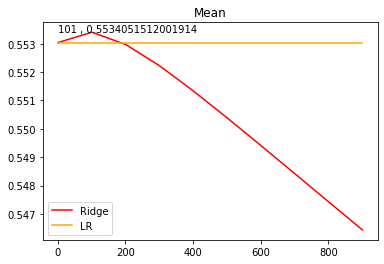

In [6]:
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = linear_model.Ridge(alpha=alpha)
    linear = linear_model.LinearRegression()
    regs = cross_val_score(reg,data.data,data.target,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,data.data,data.target,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
#这一大堆其实就是手动写了一个暴力搜索的交叉验证找alpha的最佳值并绘图

param_grid = {'alpha':np.arange(1,1001,100)}
model = linear_model.Ridge()
gridsearch = GridSearchCV(model,param_grid,n_jobs = -1,scoring = "r2")
gridsearch.fit(data.data,data.target)
print(gridsearch.best_estimator_)
print(gridsearch.best_score_)
#在此处使用girdsearch结果基本一样。

plt.plot(alpharange,ridge,color="red",label="Ridge")
maxidx = np.argmax(ridge)
plt.plot(alpharange,lr,color="orange",label="LR")
show_max = str(alpharange[maxidx])+" , "+str(ridge[maxidx])
plt.annotate(show_max,xytext = (maxidx,ridge[maxidx]),xy = (maxidx,ridge[maxidx]))
plt.title("Mean")
plt.legend()
plt.show()


可以看到即使是最高值也比LR的交叉高不到哪里去。